# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

# Read files

In [2]:
dataset = pd.read_csv("D:\\Research Project\\Datasets\\Flood intensity\\data url\\Final Data\\Classification\\for_dimensionality_reduction1.csv", encoding= 'unicode_escape')
dataset.head()


,Unnamed: 0,ID,Area,Log_Area,Area_Affected_per_day,Log_Area_Affected_per_day,Log_Duration,Log_Dead,Log_Displaced,Day0_Temperature,...,Day.4_Condition_2,Day.4_Condition_3,Day.4_Condition_4,Day.4_Condition_5,Day.4_Condition_6,Day.4_Condition_7,Day.4_Condition_8,Day.4_Condition_9,Day.4_Condition_10,Flood_Risk
0,0,1,92615.67,11.44,23153.92,10.05,1.61,3.30,8.01,66.20,...,0,0,0,0,0,0,0,0,0,Low
1,1,2,678498.82,13.43,37694.38,10.54,2.94,5.44,11.29,68.59,...,0,0,0,0,0,0,0,0,0,High
2,2,3,12846.03,9.46,12846.03,9.46,0.69,3.78,6.10,77.79,...,0,0,0,0,0,0,0,0,0,Low
3,3,4,16542.12,9.71,1181.58,7.08,2.71,3.09,5.71,89.60,...,0,0,0,0,0,0,0,0,0,Low
4,4,5,20082.21,9.91,10041.10,9.21,1.10,3.00,0.00,53.29,...,0,0,0,0,0,0,0,0,0,Low


In [3]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

(10851, 117)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851 entries, 0 to 10850
Columns: 117 entries, Unnamed: 0 to Flood_Risk
dtypes: float64(22), int64(94), object(1)
memory usage: 9.7+ MB
None
        Unnamed: 0            ID          Area      Log_Area  \
count  10851.00000  10851.000000  1.085100e+04  10851.000000   
mean    5425.00000   2574.302368  1.864237e+05     11.309600   
std     3132.55822   1324.244927  2.603372e+05      1.622261   
min        0.00000      1.000000  1.195650e+01      2.560000   
25%     2712.50000   1443.000000  4.420653e+04     10.700000   
50%     5425.00000   2640.000000  1.217253e+05     11.708245   
75%     8137.50000   3706.000000  2.011250e+05     12.210998   
max    10850.00000   4928.000000  4.814281e+06     15.390000   

       Area_Affected_per_day  Log_Area_Affected_per_day  Log_Duration  \
count           1.085100e+04               10851.000000  10851.000000   
mean            2.823020e+04                   9.331311      2.165262   

In [4]:
i=''
for col in dataset.columns: 
    i = "'"+col+"'"+","
    print(i) 

'Unnamed: 0',
'ID',
'Area',
'Log_Area',
'Area_Affected_per_day',
'Log_Area_Affected_per_day',
'Log_Duration',
'Log_Dead',
'Log_Displaced',
'Day0_Temperature',
'Day.1_Temperature',
'Day.2_Temperature',
'Day.3_Temperature',
'Day.4_Temperature',
'Day0_Dew_Point',
'Day.1_Dew_Point',
'Day.2_Dew_Point',
'Day.3_Dew_Point',
'Day.4_Dew_Point',
'Day0_Humidity',
'Day.1_Humidity',
'Day.2_Humidity',
'Day.3_Humidity',
'Day.4_Humidity',
'Day0_Wind_Speed',
'Day.1_Wind_Speed',
'Day.2_Wind_Speed',
'Day.3_Wind_Speed',
'Day.4_Wind_Speed',
'Day0_Wind_Gust',
'Day0_Pressure',
'Day.1_Pressure',
'Day.2_Pressure',
'Day.3_Pressure',
'Day.4_Pressure',
'MainCause_0',
'MainCause_1',
'MainCause_2',
'MainCause_3',
'MainCause_4',
'MainCause_5',
'MainCause_6',
'MainCause_7',
'MainCause_8',
'MainCause_9',
'MainCause_10',
'MainCause_11',
'MainCause_12',
'MainCause_13',
'MainCause_14',
'MainCause_15',
'MainCause_16',
'MainCause_17',
'MainCause_18',
'MainCause_19',
'MainCause_20',
'MainCause_21',
'MainCause_22',
'Day0_Cond

In [281]:
###Drop unnecessary columns
df_dm = dataset.drop(['Unnamed: 0','ID','Area','Area_Affected_per_day','Log_Area_Affected_per_day'], axis=1) 
df_dm.dtypes

Log_Area              float64
Log_Duration          float64
Log_Dead              float64
Log_Displaced         float64
Day0_Temperature      float64
Day.1_Temperature     float64
Day.2_Temperature     float64
Day.3_Temperature     float64
Day.4_Temperature     float64
Day0_Dew_Point          int64
Day.1_Dew_Point         int64
Day.2_Dew_Point         int64
Day.3_Dew_Point         int64
Day.4_Dew_Point         int64
Day0_Humidity           int64
Day.1_Humidity          int64
Day.2_Humidity          int64
Day.3_Humidity          int64
Day.4_Humidity          int64
Day0_Wind_Speed       float64
Day.1_Wind_Speed      float64
Day.2_Wind_Speed      float64
Day.3_Wind_Speed      float64
Day.4_Wind_Speed      float64
Day0_Wind_Gust          int64
Day0_Pressure         float64
Day.1_Pressure        float64
Day.2_Pressure        float64
Day.3_Pressure        float64
Day.4_Pressure        float64
                       ...   
Day.2_Condition_6       int64
Day.2_Condition_7       int64
Day.2_Cond

In [210]:
#correlation plot
corr = df_dm.corr()
corr.style.background_gradient(cmap='coolwarm')

In [282]:
df_dm_bck=df_dm

Calculate average field for correlated fields

In [283]:
df_dm["Avg_Temperature"] = (df_dm['Day0_Temperature'] + df_dm['Day.1_Temperature'] + df_dm['Day.2_Temperature'] +df_dm['Day.3_Temperature']+ df_dm['Day.4_Temperature'])/5
df_dm["Avg_Dew_Point"] = (df_dm['Day0_Dew_Point'] + df_dm['Day.1_Dew_Point'] + df_dm['Day.2_Dew_Point'] +df_dm['Day.3_Dew_Point']+ df_dm['Day.4_Dew_Point'])/5
df_dm["Avg_Humidity"] = (df_dm['Day0_Humidity'] + df_dm['Day.1_Humidity'] + df_dm['Day.2_Humidity'] +df_dm['Day.3_Humidity']+ df_dm['Day.4_Humidity'])/5
df_dm["Avg_Wind_Speed"] = (df_dm['Day0_Wind_Speed'] + df_dm['Day.1_Wind_Speed'] + df_dm['Day.2_Wind_Speed'] +df_dm['Day.3_Wind_Speed']+ df_dm['Day.4_Wind_Speed'])/5
#df_dm_bck["Avg_Wind_Gust"] = (df_dm_bck['Day0_Wind_Gust'] + df_dm_bck['Day.1_Wind_Gust'] + df_dm_bck['Day.2_Wind_Gust'] +df_dm_bck['Day.3_Wind_Gust']+ df_dm_bck['Day.4_Wind_Gust'])/5
df_dm["Avg_Pressure"] = (df_dm['Day0_Pressure'] + df_dm['Day.1_Pressure'] + df_dm['Day.2_Pressure'] +df_dm['Day.3_Pressure']+ df_dm['Day.4_Pressure'])/5

In [284]:
df_dm.drop(['Day0_Temperature', 'Day.1_Temperature','Day.2_Temperature','Day.3_Temperature','Day.4_Temperature','Day0_Dew_Point','Day.1_Dew_Point','Day.2_Dew_Point','Day.3_Dew_Point','Day.4_Dew_Point','Day0_Humidity','Day.1_Humidity','Day.2_Humidity','Day.3_Humidity','Day.4_Humidity','Day0_Wind_Speed','Day.1_Wind_Speed','Day.2_Wind_Speed','Day.3_Wind_Speed','Day.4_Wind_Speed','Day0_Pressure','Day.1_Pressure','Day.2_Pressure','Day.3_Pressure','Day.4_Pressure'], axis=1, inplace=True)


In [11]:
#correlation plot
# corr = df_dm_bck.corr()
# corr.style.background_gradient(cmap='coolwarm')
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

# Non-Tree Based Models

In [476]:
# Separating out the features
X = df_dm[[
'Log_Duration',
'Log_Dead',
'Log_Displaced',
'Avg_Temperature','Avg_Dew_Point','Avg_Humidity','Avg_Wind_Speed','Avg_Pressure',
    'MainCause_0',
'MainCause_1',
'MainCause_2',
'MainCause_3',
'MainCause_4',
'MainCause_5',
'MainCause_6',
'MainCause_7',
'MainCause_8',
'MainCause_9',
'MainCause_10',
'MainCause_11',
'MainCause_12',
'MainCause_13',
'MainCause_14',
'MainCause_15',
'MainCause_16',
'MainCause_17',
'MainCause_18',
'MainCause_19',
'MainCause_20',
'MainCause_21',
'MainCause_22',
'Day0_Condition_0',
'Day0_Condition_1',
'Day0_Condition_2',
'Day0_Condition_3',
'Day0_Condition_4',
'Day0_Condition_5',
'Day0_Condition_6',
'Day0_Condition_7',
'Day0_Condition_8',
'Day0_Condition_9',
'Day0_Condition_10',
'Day0_Condition_11',
'Day0_Condition_12',
'Day0_Condition_13',
'Day.1_Condition_0',
'Day.1_Condition_1',
'Day.1_Condition_2',
'Day.1_Condition_3',
'Day.1_Condition_4',
'Day.1_Condition_5',
'Day.1_Condition_6',
'Day.1_Condition_7',
'Day.1_Condition_8',
'Day.2_Condition_0',
'Day.2_Condition_1',
'Day.2_Condition_2',
'Day.2_Condition_3',
'Day.2_Condition_4',
'Day.2_Condition_5',
'Day.2_Condition_6',
'Day.2_Condition_7',
'Day.2_Condition_8',
'Day.2_Condition_9',
'Day.2_Condition_10',
'Day.2_Condition_11',
'Day.2_Condition_12',
'Day.2_Condition_13',
'Day.2_Condition_14',
'Day.2_Condition_15',
'Day.3_Condition_0',
'Day.3_Condition_1',
'Day.3_Condition_2',
'Day.3_Condition_3',
'Day.3_Condition_4',
'Day.3_Condition_5',
'Day.3_Condition_6',
'Day.3_Condition_7',
'Day.4_Condition_0',
'Day.4_Condition_1',
'Day.4_Condition_2',
'Day.4_Condition_3',
'Day.4_Condition_4',
'Day.4_Condition_5',
'Day.4_Condition_6',
'Day.4_Condition_7',
'Day.4_Condition_8',
'Day.4_Condition_9',
'Day.4_Condition_10' 
]].values

# Separating out the target
y = df_dm['Flood_Risk'].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [478]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train)

(8680, 89)
(8680,)
(2171, 89)
(2171,)
['Moderate' 'High' 'Moderate' ... 'Moderate' 'Moderate' 'Low']


# k Nearest Neighbour Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=93)
   
# #Fit the model
# knn.fit(X_train, y_train)

# #Compute accuracy on the training set
# train_accuracy = knn.score(X_train, y_train)
# print(train_accuracy)
# #Compute accuracy on the test set
# test_accuracy= knn.score(X_test, y_test)
# print(test_accuracy)
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,95)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

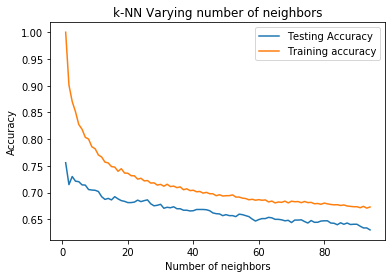

In [25]:
#Generate plot
#neighbors = 93
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [26]:
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94])

GridSearch 

In [29]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(6,100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.6938701399045227
{'n_neighbors': 6}


In [479]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=6)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7144173192077383

In [480]:
knn.score(X_train,y_train)

0.8185483870967742

In [216]:
#let us get the predictions using the classifier we had fit above
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[429, 128, 166],
       [ 60, 607,  12],
       [179,  75, 515]], dtype=int64)

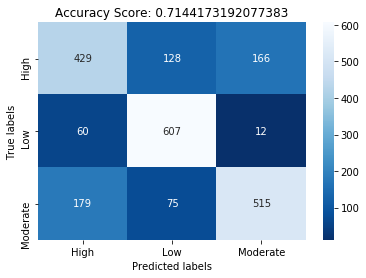

In [234]:
# # Print the confusion matrix for the model 
# import seaborn as sns
# from sklearn import metrics
conf_matrix = confusion_matrix(y_test, y_pred)


# plt.figure(figsize = (7,7))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred)))
# plt.xlabel("Prediction")
# plt.ylabel("Actual")
# plt.show()



# from sklearn.metrics import confusion_matrix

# labels = ['High', 'Low', 'Moderate']
# cm = confusion_matrix(y_test, y_pred, labels)
# print(cm)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cm)
# plt.title('Confusion matrix of the classifier')
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, fmt=".0f",cmap = 'Blues_r'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred))); 
ax.xaxis.set_ticklabels(['High', 'Low', 'Moderate']); ax.yaxis.set_ticklabels(['High', 'Low', 'Moderate']);

In [214]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.71
Macro Recall: 0.72
Macro F1-score: 0.71

Weighted Precision: 0.71
Weighted Recall: 0.71
Weighted F1-score: 0.71

Classification Report

              precision    recall  f1-score   support

        High       0.64      0.59      0.62       723
         Low       0.75      0.89      0.82       679
    Moderate       0.74      0.67      0.70       769

    accuracy                           0.71      2171
   macro avg       0.71      0.72      0.71      2171
weighted avg       0.71      0.71      0.71      2171



# Support Vector Machine

In [32]:
#We can use a grid search to find the best parameters for this model. Lets try

#Define a list of parameters for the models
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#We can build Grid Search model using the above parameters. 
#cv=5 means cross validation with 5 folds
grid_search = GridSearchCV(SVC(random_state=0), params, cv=5, n_jobs=-1)
grid_search.fit(X_train,y_train)

print("train score - " + str(grid_search.score(X_train,y_train)))
print("test score - " + str(grid_search.score(X_test, y_test)))

train score - 0.9580645161290322
test score - 0.7600184246890834


In [33]:
#We got a better score now. Lets check the best parameters the model used.
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.1}


In [34]:
#We can visualize the parameter dependency with the models
results_df = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results_df.mean_test_score).reshape(6, 6)

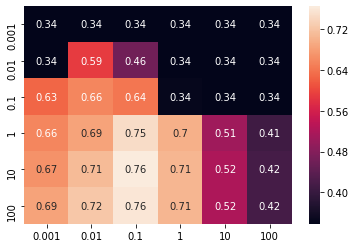

In [35]:
sns.heatmap(scores, annot=True, 
            xticklabels=params['gamma'], yticklabels=params['C'])

In [235]:
# Radial kernel will be used as the kernel function 
from sklearn.svm import SVC 

#svc = SVC(kernel='rbf', C = 1, gamma='scale')
svc = SVC(kernel='rbf', C = 10, gamma=0.1)
svc.fit(X_train,y_train)

pred_y_svc = svc.predict(X_test)

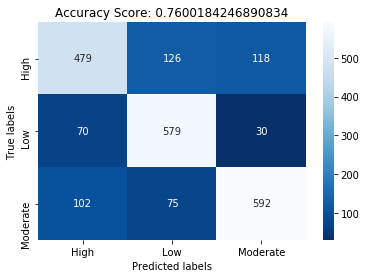

In [236]:
# Print the confusion matrix for the model 
import seaborn as sns
from sklearn import metrics
conf_matrix = confusion_matrix(y_test, pred_y_svc)

# plt.figure(figsize = (7,7))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, pred_y_svc)))
# plt.xlabel("Prediction")
# plt.ylabel("Actual")
# plt.show()


ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, fmt=".0f",cmap = 'Blues_r'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, pred_y_svc))); 
ax.xaxis.set_ticklabels(['High', 'Low', 'Moderate']); ax.yaxis.set_ticklabels(['High', 'Low', 'Moderate']);

In [238]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred_y_svc)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred_y_svc, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred_y_svc, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred_y_svc, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred_y_svc, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred_y_svc, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred_y_svc, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred_y_svc, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred_y_svc, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred_y_svc, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred_y_svc))


Accuracy: 0.76

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.76
Macro Recall: 0.76
Macro F1-score: 0.76

Weighted Precision: 0.76
Weighted Recall: 0.76
Weighted F1-score: 0.76

Classification Report

              precision    recall  f1-score   support

        High       0.74      0.66      0.70       723
         Low       0.74      0.85      0.79       679
    Moderate       0.80      0.77      0.78       769

    accuracy                           0.76      2171
   macro avg       0.76      0.76      0.76      2171
weighted avg       0.76      0.76      0.76      2171



# Tree Based Algorithm

In [451]:
# Separating out the features
X = df_dm[[
'Log_Duration',
'Log_Dead',
'Log_Displaced',
'Avg_Temperature','Avg_Dew_Point','Avg_Humidity','Avg_Wind_Speed','Avg_Pressure',
    'MainCause_0',
'MainCause_1',
'MainCause_2',
'MainCause_3',
'MainCause_4',
'MainCause_5',
'MainCause_6',
'MainCause_7',
'MainCause_8',
'MainCause_9',
'MainCause_10',
'MainCause_11',
'MainCause_12',
'MainCause_13',
'MainCause_14',
'MainCause_15',
'MainCause_16',
'MainCause_17',
'MainCause_18',
'MainCause_19',
'MainCause_20',
'MainCause_21',
'MainCause_22',
'Day0_Condition_0',
'Day0_Condition_1',
'Day0_Condition_2',
'Day0_Condition_3',
'Day0_Condition_4',
'Day0_Condition_5',
'Day0_Condition_6',
'Day0_Condition_7',
'Day0_Condition_8',
'Day0_Condition_9',
'Day0_Condition_10',
'Day0_Condition_11',
'Day0_Condition_12',
'Day0_Condition_13',
'Day.1_Condition_0',
'Day.1_Condition_1',
'Day.1_Condition_2',
'Day.1_Condition_3',
'Day.1_Condition_4',
'Day.1_Condition_5',
'Day.1_Condition_6',
'Day.1_Condition_7',
'Day.1_Condition_8',
'Day.2_Condition_0',
'Day.2_Condition_1',
'Day.2_Condition_2',
'Day.2_Condition_3',
'Day.2_Condition_4',
'Day.2_Condition_5',
'Day.2_Condition_6',
'Day.2_Condition_7',
'Day.2_Condition_8',
'Day.2_Condition_9',
'Day.2_Condition_10',
'Day.2_Condition_11',
'Day.2_Condition_12',
'Day.2_Condition_13',
'Day.2_Condition_14',
'Day.2_Condition_15',
'Day.3_Condition_0',
'Day.3_Condition_1',
'Day.3_Condition_2',
'Day.3_Condition_3',
'Day.3_Condition_4',
'Day.3_Condition_5',
'Day.3_Condition_6',
'Day.3_Condition_7',
'Day.4_Condition_0',
'Day.4_Condition_1',
'Day.4_Condition_2',
'Day.4_Condition_3',
'Day.4_Condition_4',
'Day.4_Condition_5',
'Day.4_Condition_6',
'Day.4_Condition_7',
'Day.4_Condition_8',
'Day.4_Condition_9',
'Day.4_Condition_10' 
]].values

# Separating out the target
y = df_dm['Flood_Risk'].values
# Standardizing the features
#X = StandardScaler().fit_transform(X)

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Decision Tree

In [85]:
model = DecisionTreeClassifier()

grid = {'criterion': [ "entropy", "gini"],
        'max_depth': range(1, 30) ,'random_state': range(2, 50) #,
        }

search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=8, 
                             cv=5, verbose=1, return_train_score=True)

search.fit(X_train, y_train)

# and after some hours...
df_search = pd.DataFrame(search.cv_results_)
df_search.sort_values("mean_test_score", inplace=True)

Fitting 5 folds for each of 2784 candidates, totalling 13920 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  88 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 688 tasks      | elapsed:    8.9s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:   31.5s
[Parallel(n_jobs=8)]: Done 2228 tasks      | elapsed:   58.6s
[Parallel(n_jobs=8)]: Done 3128 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 4228 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 5364 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done 6114 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 6964 tasks      | elapsed:  5.2min
[Parallel(n_jobs=8)]: Done 8790 tasks      | elapsed:  5.9min
[Parallel(n_jobs=8)]: Done 10890 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Done 13190 tasks      | elapsed:  8.7min
[Parallel(n_jobs=8)]: Done 13920 out of 13920 | elapsed:  9.2min finished


In [86]:
df_search[["mean_test_score", "std_test_score"]].tail()

,mean_test_score,std_test_score
1206,0.695968,0.008845
1248,0.696198,0.007319
2690,0.696659,0.006200
1220,0.696889,0.008010
1302,0.697581,0.008316


In [87]:
search.best_score_, search.best_params_

(0.6975806451612904,
 {'criterion': 'entropy', 'max_depth': 28, 'random_state': 8})

In [475]:
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=24, random_state=42)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=29)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6946107784431138


In [258]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, y_pred) 
results

array([[457,  99, 167],
       [104, 492,  83],
       [133,  64, 572]], dtype=int64)

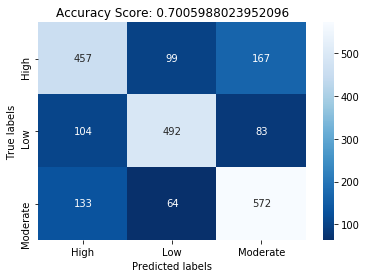

In [259]:
# # Print the confusion matrix for the model 
conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize = (7,7))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred)))
# plt.xlabel("Prediction")
# plt.ylabel("Actual")
# plt.show()


ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, fmt=".0f",cmap = 'Blues_r'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred))); 
ax.xaxis.set_ticklabels(['High', 'Low', 'Moderate']); ax.yaxis.set_ticklabels(['High', 'Low', 'Moderate']);

In [260]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.70

Micro Precision: 0.70
Micro Recall: 0.70
Micro F1-score: 0.70

Macro Precision: 0.70
Macro Recall: 0.70
Macro F1-score: 0.70

Weighted Precision: 0.70
Weighted Recall: 0.70
Weighted F1-score: 0.70

Classification Report

              precision    recall  f1-score   support

        High       0.66      0.63      0.65       723
         Low       0.75      0.72      0.74       679
    Moderate       0.70      0.74      0.72       769

    accuracy                           0.70      2171
   macro avg       0.70      0.70      0.70      2171
weighted avg       0.70      0.70      0.70      2171



In [47]:
params = search.best_params_

In [481]:
# from sklearn.metrics import roc_auc_score

# model = DecisionTreeClassifier(**params, random_state=42)
# model.fit(X_train, y_train)

# roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

# Random Forest

In [250]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 100)
rf=rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8258866881621373


In [251]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, y_pred) 
results

array([[530, 107,  86],
       [ 49, 627,   3],
       [ 66,  67, 636]], dtype=int64)

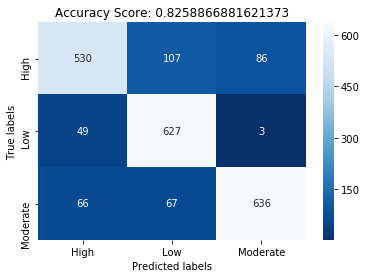

In [254]:
# Print the confusion matrix for the model 
conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize = (7,7))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred)))
# plt.xlabel("Prediction")
# plt.ylabel("Actual")
# plt.show()

ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, fmt=".0f",cmap = 'Blues_r'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred))); 
ax.xaxis.set_ticklabels(['High', 'Low', 'Moderate']); ax.yaxis.set_ticklabels(['High', 'Low', 'Moderate']);

In [253]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.83

Micro Precision: 0.83
Micro Recall: 0.83
Micro F1-score: 0.83

Macro Precision: 0.83
Macro Recall: 0.83
Macro F1-score: 0.82

Weighted Precision: 0.83
Weighted Recall: 0.83
Weighted F1-score: 0.82

Classification Report

              precision    recall  f1-score   support

        High       0.82      0.73      0.77       723
         Low       0.78      0.92      0.85       679
    Moderate       0.88      0.83      0.85       769

    accuracy                           0.83      2171
   macro avg       0.83      0.83      0.82      2171
weighted avg       0.83      0.83      0.82      2171



In [122]:
rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'], 'random_state' : [35, 100]
    
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200, 'random_state': 100}


In [123]:
rf = RandomForestClassifier(n_estimators = 200, criterion='entropy', max_depth= 8, max_features='auto', random_state=100)
rf=rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6771073238139106


In [124]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Accuracy: 0.68

Micro Precision: 0.68
Micro Recall: 0.68
Micro F1-score: 0.68

Macro Precision: 0.67
Macro Recall: 0.68
Macro F1-score: 0.67

Weighted Precision: 0.67
Weighted Recall: 0.68
Weighted F1-score: 0.67

Classification Report

              precision    recall  f1-score   support

     Class 1       0.65      0.48      0.55       723
     Class 2       0.70      0.92      0.79       679
     Class 3       0.67      0.65      0.66       769

    accuracy                           0.68      2171
   macro avg       0.67      0.68      0.67      2171
weighted avg       0.67      0.68      0.67      2171



# Ensemble Techniques

# Bagging Classifier

In [299]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
a=model.fit(X_train,y_train)
model.score(X_test,y_test)
# y_pred = rf.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.7600184246890834

In [468]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=42))
a=model.fit(X_train,y_train)
model.score(X_test,y_test)
# y_pred = rf.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.7706126209120221

In [469]:
y_pred = a.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7706126209120221


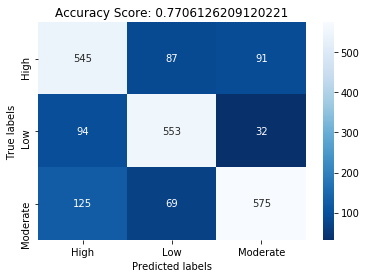

In [470]:
# Print the confusion matrix for the model 
conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize = (7,7))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred)))
# plt.xlabel("Prediction")
# plt.ylabel("Actual")
# plt.show()

ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, fmt=".0f",cmap = 'Blues_r'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred))); 
ax.xaxis.set_ticklabels(['High', 'Low', 'Moderate']); ax.yaxis.set_ticklabels(['High', 'Low', 'Moderate']);

In [471]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.77

Micro Precision: 0.77
Micro Recall: 0.77
Micro F1-score: 0.77

Macro Precision: 0.77
Macro Recall: 0.77
Macro F1-score: 0.77

Weighted Precision: 0.77
Weighted Recall: 0.77
Weighted F1-score: 0.77

Classification Report

              precision    recall  f1-score   support

        High       0.71      0.75      0.73       723
         Low       0.78      0.81      0.80       679
    Moderate       0.82      0.75      0.78       769

    accuracy                           0.77      2171
   macro avg       0.77      0.77      0.77      2171
weighted avg       0.77      0.77      0.77      2171



# AdaBoost Classifier

In [300]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
a=model.fit(X_train,y_train)
model.score(X_test,y_test)

0.630584983878397

In [301]:
y_pred = a.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.630584983878397


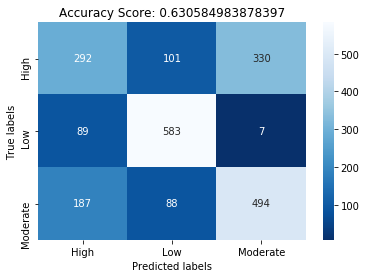

In [302]:
# Print the confusion matrix for the model 
conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize = (7,7))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred)))
# plt.xlabel("Prediction")
# plt.ylabel("Actual")
# plt.show()
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, fmt=".0f",cmap = 'Blues_r'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred))); 
ax.xaxis.set_ticklabels(['High', 'Low', 'Moderate']); ax.yaxis.set_ticklabels(['High', 'Low', 'Moderate']);

In [303]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.63

Micro Precision: 0.63
Micro Recall: 0.63
Micro F1-score: 0.63

Macro Precision: 0.62
Macro Recall: 0.63
Macro F1-score: 0.62

Weighted Precision: 0.62
Weighted Recall: 0.63
Weighted F1-score: 0.62

Classification Report

              precision    recall  f1-score   support

        High       0.51      0.40      0.45       723
         Low       0.76      0.86      0.80       679
    Moderate       0.59      0.64      0.62       769

    accuracy                           0.63      2171
   macro avg       0.62      0.63      0.62      2171
weighted avg       0.62      0.63      0.62      2171



# Gradient Boost Classifier

In [304]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
a= model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6112390603408567

In [305]:
y_pred = a.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6112390603408567


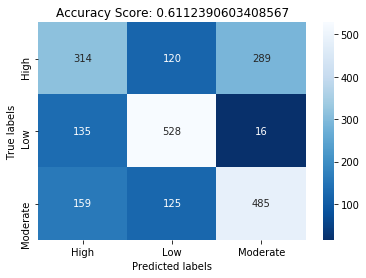

In [306]:
# Print the confusion matrix for the model 
conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize = (7,7))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred)))
# plt.xlabel("Prediction")
# plt.ylabel("Actual")
# plt.show()
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, fmt=".0f",cmap = 'Blues_r'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred))); 
ax.xaxis.set_ticklabels(['High', 'Low', 'Moderate']); ax.yaxis.set_ticklabels(['High', 'Low', 'Moderate']);

In [307]:

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.61

Micro Precision: 0.61
Micro Recall: 0.61
Micro F1-score: 0.61

Macro Precision: 0.60
Macro Recall: 0.61
Macro F1-score: 0.61

Weighted Precision: 0.60
Weighted Recall: 0.61
Weighted F1-score: 0.60

Classification Report

              precision    recall  f1-score   support

        High       0.52      0.43      0.47       723
         Low       0.68      0.78      0.73       679
    Moderate       0.61      0.63      0.62       769

    accuracy                           0.61      2171
   macro avg       0.60      0.61      0.61      2171
weighted avg       0.60      0.61      0.60      2171



# XGBoost Classifier

In [308]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
a= model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6678949792722247

In [309]:
y_pred = a.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6678949792722247


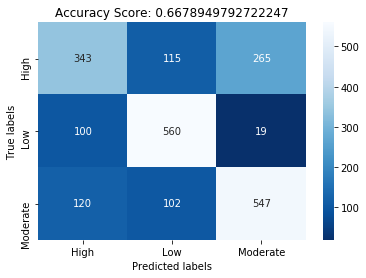

In [310]:
# Print the confusion matrix for the model 
conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize = (7,7))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred)))
# plt.xlabel("Prediction")
# plt.ylabel("Actual")
# plt.show()

ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, fmt=".0f",cmap = 'Blues_r'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("Accuracy Score: {}".format(metrics.accuracy_score(y_test, y_pred))); 
ax.xaxis.set_ticklabels(['High', 'Low', 'Moderate']); ax.yaxis.set_ticklabels(['High', 'Low', 'Moderate']);

In [311]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.67

Micro Precision: 0.67
Micro Recall: 0.67
Micro F1-score: 0.67

Macro Precision: 0.66
Macro Recall: 0.67
Macro F1-score: 0.66

Weighted Precision: 0.66
Weighted Recall: 0.67
Weighted F1-score: 0.66

Classification Report

              precision    recall  f1-score   support

        High       0.61      0.47      0.53       723
         Low       0.72      0.82      0.77       679
    Moderate       0.66      0.71      0.68       769

    accuracy                           0.67      2171
   macro avg       0.66      0.67      0.66      2171
weighted avg       0.66      0.67      0.66      2171



# Neural Network

In [433]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers.core import Activation, Dropout

In [434]:
# #df_pca = df_pca.drop(['Unnamed: 0','Country','Began','Ended'], axis=1)
df_dm_nn = dataset.drop(['Unnamed: 0','ID','Area','Area_Affected_per_day','Log_Area_Affected_per_day'], axis=1) 
df_dm_nn.dtypes

Log_Area              float64
Log_Duration          float64
Log_Dead              float64
Log_Displaced         float64
Day0_Temperature      float64
Day.1_Temperature     float64
Day.2_Temperature     float64
Day.3_Temperature     float64
Day.4_Temperature     float64
Day0_Dew_Point          int64
Day.1_Dew_Point         int64
Day.2_Dew_Point         int64
Day.3_Dew_Point         int64
Day.4_Dew_Point         int64
Day0_Humidity           int64
Day.1_Humidity          int64
Day.2_Humidity          int64
Day.3_Humidity          int64
Day.4_Humidity          int64
Day0_Wind_Speed       float64
Day.1_Wind_Speed      float64
Day.2_Wind_Speed      float64
Day.3_Wind_Speed      float64
Day.4_Wind_Speed      float64
Day0_Wind_Gust          int64
Day0_Pressure         float64
Day.1_Pressure        float64
Day.2_Pressure        float64
Day.3_Pressure        float64
Day.4_Pressure        float64
                       ...   
Day.2_Condition_6       int64
Day.2_Condition_7       int64
Day.2_Cond

In [444]:
# #run model 
# Separating out the features
x = df_dm_nn[[

'Log_Duration',
'Log_Dead',
'Log_Displaced',
'Day0_Temperature',
'Day.1_Temperature',
'Day.2_Temperature',
'Day.3_Temperature',
'Day.4_Temperature',
'Day0_Dew_Point',
'Day.1_Dew_Point',
'Day.2_Dew_Point',
'Day.3_Dew_Point',
'Day.4_Dew_Point',
'Day0_Humidity',
'Day.1_Humidity',
'Day.2_Humidity',
'Day.3_Humidity',
'Day.4_Humidity',
'Day0_Wind_Speed',
'Day.1_Wind_Speed',
'Day.2_Wind_Speed',
'Day.3_Wind_Speed',
'Day.4_Wind_Speed',
'Day0_Wind_Gust',
'Day0_Pressure' ,
'Day.1_Pressure',
'Day.2_Pressure',
'Day.3_Pressure',
'Day.4_Pressure'#,
    
#'Avg_Temperature','Avg_Dew_Point','Avg_Humidity','Avg_Wind_Speed','Avg_Pressure',
#     'MainCause_0',
# 'MainCause_1',
# 'MainCause_2',
# 'MainCause_3',
# 'MainCause_4',
# 'MainCause_5',
# 'MainCause_6',
# 'MainCause_7',
# 'MainCause_8',
# 'MainCause_9',
# 'MainCause_10',
# 'MainCause_11',
# 'MainCause_12',
# 'MainCause_13',
# 'MainCause_14',
# 'MainCause_15',
# 'MainCause_16',
# 'MainCause_17',
# 'MainCause_18',
# 'MainCause_19',
# 'MainCause_20',
# 'MainCause_21',
# 'MainCause_22',
# 'Day0_Condition_0',
# 'Day0_Condition_1',
# 'Day0_Condition_2',
# 'Day0_Condition_3',
# 'Day0_Condition_4',
# 'Day0_Condition_5',
# 'Day0_Condition_6',
# 'Day0_Condition_7',
# 'Day0_Condition_8',
# 'Day0_Condition_9',
# 'Day0_Condition_10',
# 'Day0_Condition_11',
# 'Day0_Condition_12',
# 'Day0_Condition_13',
# 'Day.1_Condition_0',
# 'Day.1_Condition_1',
# 'Day.1_Condition_2',
# 'Day.1_Condition_3',
# 'Day.1_Condition_4',
# 'Day.1_Condition_5',
# 'Day.1_Condition_6',
# 'Day.1_Condition_7',
# 'Day.1_Condition_8',
# 'Day.2_Condition_0',
# 'Day.2_Condition_1',
# 'Day.2_Condition_2',
# 'Day.2_Condition_3',
# 'Day.2_Condition_4',
# 'Day.2_Condition_5',
# 'Day.2_Condition_6',
# 'Day.2_Condition_7',
# 'Day.2_Condition_8',
# 'Day.2_Condition_9',
# 'Day.2_Condition_10',
# 'Day.2_Condition_11',
# 'Day.2_Condition_12',
# 'Day.2_Condition_13',
# 'Day.2_Condition_14',
# 'Day.2_Condition_15',
# 'Day.3_Condition_0',
# 'Day.3_Condition_1',
# 'Day.3_Condition_2',
# 'Day.3_Condition_3',
# 'Day.3_Condition_4',
# 'Day.3_Condition_5',
# 'Day.3_Condition_6',
# 'Day.3_Condition_7',
# 'Day.4_Condition_0',
# 'Day.4_Condition_1',
# 'Day.4_Condition_2',
# 'Day.4_Condition_3',
# 'Day.4_Condition_4',
# 'Day.4_Condition_5',
# 'Day.4_Condition_6',
# 'Day.4_Condition_7',
# 'Day.4_Condition_8',
# 'Day.4_Condition_9',
# 'Day.4_Condition_10' 
]].values

# Separating out the target
y = df_dm_nn['Flood_Risk'].values
# Standardizing the features
x = StandardScaler().fit_transform(x)



In [445]:
print(y)

['Low' 'High' 'Low' ... 'Moderate' 'Moderate' 'Moderate']


In [446]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_transform = lb.fit_transform(df_dm_nn.Flood_Risk)
print(y_transform)

[[0 1 0]
 [1 0 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [447]:
#splitting into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y_transform,test_size=.25)

In [448]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(8138, 29)
(8138, 3)
(2713, 29)
(2713, 3)


In [449]:

#creating model

model = Sequential()
#adding layer
model.add(Dense(units =15,input_dim =29,activation='relu')) # hidden layer
model.add(Dense(units=7,activation='relu')) 
#model.add(Dense(units=10,activation='relu')) 
model.add(Dense(units=3,activation='sigmoid')) #output layer

#compiling model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [450]:
# model = Sequential()
# #adding layer
# model.add(Dense(units =55,input_dim =110,activation='relu')) # hidden layer
# model.add(Dense(units=35,activation='relu')) 
# model.add(Dense(units=10,activation='relu')) 
# model.add(Dense(units=3,activation='softmax')) #output layer

# #compiling model

# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
print (model.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_42 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 24        
Total params: 586
Trainable params: 586
Non-trainable params: 0
_________________________________________________________________
None


In [366]:
#train the model
#history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=200, validation_data = (x_test, y_test), verbose = 1)
history = model.fit(x_train,y_train,batch_size=64,epochs=500, validation_data = (x_test, y_test), verbose = 1)

Train on 8138 samples, validate on 2713 samples
Epoch 1/500
8138/8138 [==============================] - 0s 33us/step - loss: 1.0743 - accuracy: 0.4000 - val_loss: 1.0544 - val_accuracy: 0.4508
Epoch 2/500
8138/8138 [==============================] - 0s 17us/step - loss: 1.0332 - accuracy: 0.4681 - val_loss: 1.0225 - val_accuracy: 0.4714
Epoch 3/500
8138/8138 [==============================] - 0s 17us/step - loss: 1.0033 - accuracy: 0.4833 - val_loss: 1.0075 - val_accuracy: 0.4781
Epoch 4/500
8138/8138 [==============================] - 0s 17us/step - loss: 0.9873 - accuracy: 0.4899 - val_loss: 0.9937 - val_accuracy: 0.4932
Epoch 5/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.9754 - accuracy: 0.5014 - val_loss: 0.9851 - val_accuracy: 0.4983
Epoch 6/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.9653 - accuracy: 0.5095 - val_loss: 0.9794 - val_accuracy: 0.5053
Epoch 7/500
8138/8138 [==============================] - 0s 17us/step - loss

8138/8138 [==============================] - 0s 18us/step - loss: 0.7796 - accuracy: 0.6416 - val_loss: 0.8514 - val_accuracy: 0.5982
Epoch 57/500
8138/8138 [==============================] - 0s 20us/step - loss: 0.7772 - accuracy: 0.6449 - val_loss: 0.8546 - val_accuracy: 0.5993
Epoch 58/500
8138/8138 [==============================] - 0s 17us/step - loss: 0.7777 - accuracy: 0.6476 - val_loss: 0.8516 - val_accuracy: 0.6012
Epoch 59/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.7743 - accuracy: 0.6473 - val_loss: 0.8548 - val_accuracy: 0.6015
Epoch 60/500
8138/8138 [==============================] - 0s 17us/step - loss: 0.7762 - accuracy: 0.6471 - val_loss: 0.8490 - val_accuracy: 0.5964
Epoch 61/500
8138/8138 [==============================] - 0s 17us/step - loss: 0.7741 - accuracy: 0.6472 - val_loss: 0.8480 - val_accuracy: 0.6027
Epoch 62/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.7726 - accuracy: 0.6481 - val_loss: 0.8483 - val_a

Epoch 112/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.7318 - accuracy: 0.6772 - val_loss: 0.8259 - val_accuracy: 0.6185
Epoch 113/500
8138/8138 [==============================] - 0s 17us/step - loss: 0.7318 - accuracy: 0.6776 - val_loss: 0.8279 - val_accuracy: 0.6211
Epoch 114/500
8138/8138 [==============================] - 0s 21us/step - loss: 0.7315 - accuracy: 0.6747 - val_loss: 0.8278 - val_accuracy: 0.6196
Epoch 115/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.7300 - accuracy: 0.6758 - val_loss: 0.8250 - val_accuracy: 0.6218
Epoch 116/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.7302 - accuracy: 0.6735 - val_loss: 0.8293 - val_accuracy: 0.6163
Epoch 117/500
8138/8138 [==============================] - 0s 17us/step - loss: 0.7291 - accuracy: 0.6767 - val_loss: 0.8246 - val_accuracy: 0.6222
Epoch 118/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.7290 - accuracy: 0.6749 - val_

8138/8138 [==============================] - 0s 18us/step - loss: 0.7123 - accuracy: 0.6852 - val_loss: 0.8273 - val_accuracy: 0.6174
Epoch 168/500
8138/8138 [==============================] - 0s 22us/step - loss: 0.7140 - accuracy: 0.6844 - val_loss: 0.8250 - val_accuracy: 0.6240
Epoch 169/500
8138/8138 [==============================] - 0s 28us/step - loss: 0.7129 - accuracy: 0.6862 - val_loss: 0.8242 - val_accuracy: 0.6296
Epoch 170/500
8138/8138 [==============================] - 0s 16us/step - loss: 0.7117 - accuracy: 0.6864 - val_loss: 0.8300 - val_accuracy: 0.6266
Epoch 171/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.7138 - accuracy: 0.6874 - val_loss: 0.8271 - val_accuracy: 0.6218
Epoch 172/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.7113 - accuracy: 0.6855 - val_loss: 0.8261 - val_accuracy: 0.6226
Epoch 173/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.7111 - accuracy: 0.6858 - val_loss: 0.8240 -

8138/8138 [==============================] - 0s 19us/step - loss: 0.7010 - accuracy: 0.6917 - val_loss: 0.8222 - val_accuracy: 0.6288
Epoch 223/500
8138/8138 [==============================] - 0s 21us/step - loss: 0.6986 - accuracy: 0.6930 - val_loss: 0.8226 - val_accuracy: 0.6329
Epoch 224/500
8138/8138 [==============================] - 0s 19us/step - loss: 0.7008 - accuracy: 0.6921 - val_loss: 0.8223 - val_accuracy: 0.6318
Epoch 225/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.7005 - accuracy: 0.6902 - val_loss: 0.8281 - val_accuracy: 0.6303
Epoch 226/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6992 - accuracy: 0.6930 - val_loss: 0.8236 - val_accuracy: 0.6292
Epoch 227/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6993 - accuracy: 0.6934 - val_loss: 0.8265 - val_accuracy: 0.6259
Epoch 228/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6992 - accuracy: 0.6896 - val_loss: 0.8224 -

8138/8138 [==============================] - 0s 19us/step - loss: 0.6919 - accuracy: 0.6972 - val_loss: 0.8231 - val_accuracy: 0.6332
Epoch 278/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6909 - accuracy: 0.6975 - val_loss: 0.8179 - val_accuracy: 0.6355
Epoch 279/500
8138/8138 [==============================] - 0s 19us/step - loss: 0.6901 - accuracy: 0.6973 - val_loss: 0.8163 - val_accuracy: 0.6355
Epoch 280/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6887 - accuracy: 0.6975 - val_loss: 0.8159 - val_accuracy: 0.6351
Epoch 281/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6897 - accuracy: 0.6986 - val_loss: 0.8144 - val_accuracy: 0.6355
Epoch 282/500
8138/8138 [==============================] - 0s 19us/step - loss: 0.6892 - accuracy: 0.6976 - val_loss: 0.8130 - val_accuracy: 0.6391
Epoch 283/500
8138/8138 [==============================] - 0s 21us/step - loss: 0.6893 - accuracy: 0.6983 - val_loss: 0.8155 -

8138/8138 [==============================] - 0s 19us/step - loss: 0.6818 - accuracy: 0.7059 - val_loss: 0.8161 - val_accuracy: 0.6399
Epoch 333/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6812 - accuracy: 0.7039 - val_loss: 0.8184 - val_accuracy: 0.6414
Epoch 334/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6804 - accuracy: 0.7031 - val_loss: 0.8215 - val_accuracy: 0.6395
Epoch 335/500
8138/8138 [==============================] - 0s 19us/step - loss: 0.6821 - accuracy: 0.7035 - val_loss: 0.8139 - val_accuracy: 0.6454
Epoch 336/500
8138/8138 [==============================] - 0s 28us/step - loss: 0.6816 - accuracy: 0.7061 - val_loss: 0.8178 - val_accuracy: 0.6450
Epoch 337/500
8138/8138 [==============================] - 0s 26us/step - loss: 0.6801 - accuracy: 0.7062 - val_loss: 0.8136 - val_accuracy: 0.6391
Epoch 338/500
8138/8138 [==============================] - 0s 21us/step - loss: 0.6813 - accuracy: 0.7042 - val_loss: 0.8144 -

8138/8138 [==============================] - 0s 18us/step - loss: 0.6740 - accuracy: 0.7122 - val_loss: 0.8112 - val_accuracy: 0.6495
Epoch 388/500
8138/8138 [==============================] - 0s 19us/step - loss: 0.6735 - accuracy: 0.7078 - val_loss: 0.8109 - val_accuracy: 0.6473
Epoch 389/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6740 - accuracy: 0.7094 - val_loss: 0.8077 - val_accuracy: 0.6465
Epoch 390/500
8138/8138 [==============================] - 0s 21us/step - loss: 0.6758 - accuracy: 0.7068 - val_loss: 0.8112 - val_accuracy: 0.6491
Epoch 391/500
8138/8138 [==============================] - 0s 19us/step - loss: 0.6741 - accuracy: 0.7101 - val_loss: 0.8082 - val_accuracy: 0.6502
Epoch 392/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6745 - accuracy: 0.7082 - val_loss: 0.8108 - val_accuracy: 0.6432
Epoch 393/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6752 - accuracy: 0.7095 - val_loss: 0.8114 -

8138/8138 [==============================] - 0s 19us/step - loss: 0.6703 - accuracy: 0.7118 - val_loss: 0.8111 - val_accuracy: 0.6421
Epoch 443/500
8138/8138 [==============================] - 0s 21us/step - loss: 0.6699 - accuracy: 0.7079 - val_loss: 0.8135 - val_accuracy: 0.6391
Epoch 444/500
8138/8138 [==============================] - 0s 19us/step - loss: 0.6697 - accuracy: 0.7118 - val_loss: 0.8120 - val_accuracy: 0.6432
Epoch 445/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6681 - accuracy: 0.7089 - val_loss: 0.8149 - val_accuracy: 0.6425
Epoch 446/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6691 - accuracy: 0.7089 - val_loss: 0.8116 - val_accuracy: 0.6439
Epoch 447/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6702 - accuracy: 0.7111 - val_loss: 0.8120 - val_accuracy: 0.6414
Epoch 448/500
8138/8138 [==============================] - 0s 19us/step - loss: 0.6700 - accuracy: 0.7079 - val_loss: 0.8136 -

8138/8138 [==============================] - 0s 20us/step - loss: 0.6629 - accuracy: 0.7147 - val_loss: 0.8201 - val_accuracy: 0.6399
Epoch 498/500
8138/8138 [==============================] - 0s 19us/step - loss: 0.6630 - accuracy: 0.7105 - val_loss: 0.8147 - val_accuracy: 0.6443
Epoch 499/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6619 - accuracy: 0.7084 - val_loss: 0.8165 - val_accuracy: 0.6506
Epoch 500/500
8138/8138 [==============================] - 0s 18us/step - loss: 0.6627 - accuracy: 0.7112 - val_loss: 0.8157 - val_accuracy: 0.6443


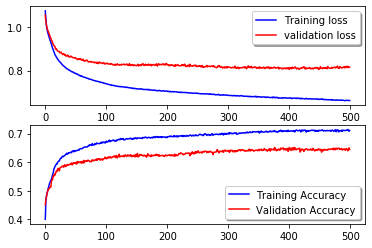

In [393]:
# # summarize history for loss
# plt.figure()
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.show()

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [368]:
#getting prediction

y_pred = model.predict(x_test)

y_pred
y_pred = lb.inverse_transform(y_pred)
y_actual = lb.inverse_transform(y_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_actual)


array([[529, 186, 166],
       [141, 569, 119],
       [203, 150, 650]], dtype=int64)

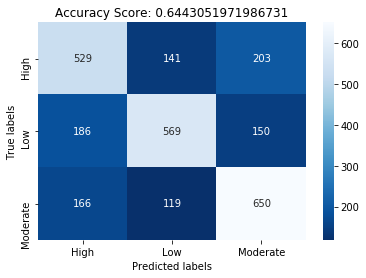

In [369]:
# Print the confusion matrix for the model 
conf_matrix = confusion_matrix(y_actual, y_pred)

# plt.figure(figsize = (7,7))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.title("Accuracy Score: {}".format(metrics.accuracy_score(y_actual, y_pred)))
# plt.xlabel("Prediction")
# plt.ylabel("Actual")
# plt.show()

ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, fmt=".0f",cmap = 'Blues_r'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("Accuracy Score: {}".format(metrics.accuracy_score(y_actual, y_pred))); 
ax.xaxis.set_ticklabels(['High', 'Low', 'Moderate']); ax.yaxis.set_ticklabels(['High', 'Low', 'Moderate']);

In [370]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_actual, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_actual, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_actual, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_actual, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_actual, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_actual, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_actual, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_actual, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_actual, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_actual, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_actual, y_pred))


Accuracy: 0.64

Micro Precision: 0.64
Micro Recall: 0.64
Micro F1-score: 0.64

Macro Precision: 0.64
Macro Recall: 0.64
Macro F1-score: 0.64

Weighted Precision: 0.65
Weighted Recall: 0.64
Weighted F1-score: 0.64

Classification Report

              precision    recall  f1-score   support

        High       0.60      0.61      0.60       873
         Low       0.69      0.63      0.66       905
    Moderate       0.65      0.70      0.67       935

    accuracy                           0.64      2713
   macro avg       0.64      0.64      0.64      2713
weighted avg       0.65      0.64      0.64      2713



Cross Validation

In [371]:
def my_model():
    model = Sequential()
    #adding layer
    model.add(Dense(units =15,input_dim =29,activation='relu')) # hidden layer
    model.add(Dense(units=7,activation='relu')) 
    #model.add(Dense(units=10,activation='relu')) 
    model.add(Dense(units=3,activation='sigmoid')) #output layer
    #compiling model

    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

In [372]:
from keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(build_fn=my_model,epochs=200,batch_size=10,verbose=1)

In [373]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(estimator=classifier,X=x_train,y=y_train, n_jobs=-1,verbose=1,cv=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  9.5min remaining:  6.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 12.9min finished


In [374]:
cv_results.mean()*100

65.33548772335052

In [375]:
cv_results.std()*100

1.5342463475246872

In [376]:
cv_results

array([0.67076164, 0.66461915, 0.63390666, 0.66707617, 0.64619166,
       0.65724814, 0.6203931 , 0.66461915, 0.66051662, 0.64821649])

In [377]:
#validating model
print(x[0])
print(y_transform[0])
model = my_model()
predictions = model.predict(x)
predictions[0]

[-0.5922405   0.66024647  0.29780659 -0.29873029 -0.07803414  0.92141414
  0.28802493 -0.28287389  0.67743823  0.15464583 -0.58612029 -0.31919087
  0.53429608  0.62425744  0.50480591 -2.13517973 -0.84416785  0.6554285
 -0.75488637 -0.4351055  -0.27796826 -0.213069   -0.35827548 -0.06374828
  0.34144877  0.63324801  0.58866831  0.58295561  0.56733366]
[0 1 0]


array([0.38974243, 0.51612777, 0.5161829 ], dtype=float32)

In [378]:
print(lb.inverse_transform(predictions)[0])
print(lb.classes_)

Moderate
['High' 'Low' 'Moderate']


In [121]:
#sns.pairplot(df_dm,hue='Flood_Risk')

LSTM

In [415]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(8138, 29, 1)
(8138, 3, 1)
(2713, 29)
(2713, 3)


In [403]:
# Reshaping X_train for efficient modelling
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [407]:
y_train = np.reshape(y_train, (y_train.shape[0],y_train.shape[1],1))


In [408]:
y_train

array([[[1],
        [0],
        [0]],

       [[0],
        [0],
        [1]],

       [[1],
        [0],
        [0]],

       ...,

       [[0],
        [1],
        [0]],

       [[0],
        [0],
        [1]],

       [[1],
        [0],
        [0]]])

In [409]:
from keras.layers import LSTM
#creating model



model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=29, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
# # Second LSTM layer
# regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.2))
# # Third LSTM layer
# regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.2))
# # Fourth LSTM layer
# regressor.add(LSTM(units=50))
# regressor.add(Dropout(0.2))
# The output layer
model.add(Dense(units=3))

# Compiling the RNN
model.compile(optimizer='adam',loss='categorical_crossentropy')
# Fitting to the training set
model.fit(x_train,y_train,epochs=50,batch_size=32)

ValueError: Error when checking target: expected dense_30 to have shape (29, 3) but got array with shape (3, 1)

In [406]:
print (model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 29, 29)            3596      
_________________________________________________________________
dropout_4 (Dropout)          (None, 29, 29)            0         
_________________________________________________________________
dense_29 (Dense)             (None, 29, 3)             90        
Total params: 3,686
Trainable params: 3,686
Non-trainable params: 0
_________________________________________________________________
None
